In [1]:
from scipy.io import wavfile
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift, ifft
from numpy import linalg as LA

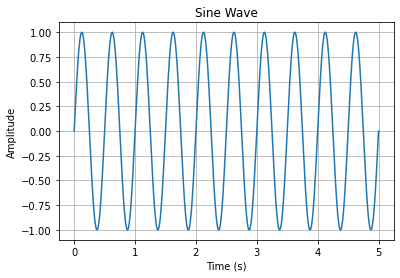

In [3]:
SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

# SAMPLE_RATE determines how many data points the signal uses to represent the sine wave per second. So if the signal had a
# sample rate of 10 Hz and was a five-second sine wave, then it would have 10 * 5 = 50 data points.

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.grid()
plt.plot(x, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title("Sine Wave")
plt.show()

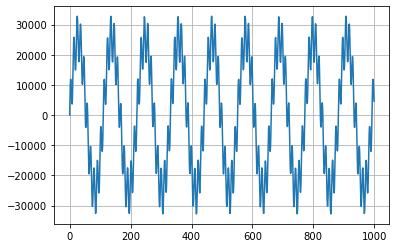

In [4]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone

# Due to how you’ll store the audio later, your target format is a 16-bit integer, which has a range from -32768 to 32767.

# Here, the code scales mixed_tone to make it fit snugly into a 16-bit integer and then cast it to that data type using 
# NumPy’s np.int16. Dividing mixed_tone by its maximum value scales it to between -1 and 1. When this signal is multiplied 
# by 32767, it is scaled between -32767 and 32767, which is roughly the range of np.int16. The code plots only the first 
# 1000 samples so you can see the structure of the signal more clearly.

normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.grid()
plt.show()

# The signal looks like a distorted sine wave. The sine wave you see is the 400 Hz tone you generated, and the distortion 
# is the 4000 Hz tone.

In [5]:
# To listen to the audio, you need to store it in a format that an audio player can read. The easiest way to do that is to 
# use SciPy’s wavfile.write method to store it in a WAV file. 16-bit integers are a standard data type for WAV files, so 
#you’ll normalize your signal to 16-bit integers:

from scipy.io.wavfile import write
# from playsound import playsound
import winsound

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
write("mysinewave.wav", SAMPLE_RATE, normalized_tone)

# This code will write to a file mysinewave.wav in the directory where you run your Python script. To play it, you can use
# the playsound or winsound function.

winsound.PlaySound('mysinewave.wav', winsound.SND_FILENAME)

[400.0, 4000.0, 4000.0, 400.0]
[2805740721.894266, 841729048.183667, 841729048.183667, 2805740721.894266]


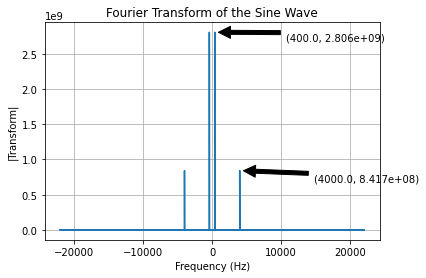

In [57]:
# Fourier Transform

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1/SAMPLE_RATE)

# fft() calculates the transform itself.
# fftfreq() calculates the frequencies in the center of each bin in the output of fft(). Without this, there would be no 
# way to plot the x-axis on your frequency spectrum.

# A bin is a range of values that have been grouped, like in a histogram. For the purposes of this tutorial, you can 
# think of them as just single values.

xlabels = []
ylabels = []

for item in datos[0].get_data()[1]:
    if item > 0.5e9:
        indice = datos[0].get_data()[1].tolist().index(item)
        xlabels.append(datos[0].get_data()[0][indice])
        ylabels.append(item)
        
print(index_labels)
print(labels)
        

plt.plot(xf, np.abs(yf))

plt.annotate(f'({xlabels[0]}, {np.format_float_scientific(ylabels[0],3)})', xy=(xlabels[0], ylabels[0]),  xycoords='data',
            xytext=(25000, 2.8e9), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

plt.annotate(f'({xlabels[1]}, {np.format_float_scientific(ylabels[1],3)})', xy=(xlabels[1], ylabels[1]),  xycoords='data',
            xytext=(30000, 0.8e9), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('|Transform|')
plt.title("Fourier Transform of the Sine Wave")
plt.show()

# As an aside, you may have noticed that fft() returns a maximum frequency of just over 20 thousand Hertz, 22050Hz, to be 
# exact. This value is exactly half of our sampling rate and is called the Nyquist frequency.

# It’s a fundamental concept in signal processing and means that your sampling rate has to be at least twice the highest 
# frequency in your signal.